In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
from matplotlib.collections import PatchCollection
import cv2
import os
import time
import copy

In [2]:
#folder for all the images created in between
RESPONSE_FOLDER = 'response-time-experiment'

trils = [1, 2, 4, 6]
sqls =  [1, 1, 1, 1]

sizels = [2, 3, 5, 7]

#total number of triangles and Squares
TRIANGLES = 4
SQUARES = 1
#total no of objects
SIZE = TRIANGLES + SQUARES
#Experiment type
FEATURE = 'feature'
CONJUNCTION = 'conjunction'
#Marker size
#change only if you want to chnage the marker size
MARKER_SIZE = 500
SEED = 1

## Gabor Modules

In [3]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters
 

def process1(img, filters):
    kern = filters[4]
    fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)

    img1 = copy.deepcopy(fimg)
    img1[img1<200] = 0
    #plt.imshow(img1)
    #plt.imshow(img1, cmap='gray')
        
    return img1, np.sum(img1)

def get_shape(filename):
    img = cv2.imread(filename, 0)
    filters = build_filters()
    img1, sum1 = process1(img, filters)
    
    #plt.imshow(img1, cmap = 'gray')
    print(sum1)
    if(sum1>20000):
        return img1, 'triangle'
    else:
        return img1, 'square'

## FIT Modules

In [4]:
#experiment type represent whether to use feature search where only one feature will be present such as shape or
#to use conjunction search where both color and shape will be present
#if nothing specified 
def generate_plot(TRIANGLES, SQUARES, SIZE,  experiment_type = 'feature'):
    np.random.seed(SEED)
    #plot  size
    fig=plt.figure(figsize=(7.5, 5), dpi= 80, facecolor='w', edgecolor='k')
    
    #generating co-ordinates uniformly
    a = np.random.uniform(-2, 2, SIZE).reshape(-1, 1)
    b = np.random.uniform(-2, 2, SIZE).reshape(-1, 1)
    #co-ordinates
    cord = np.concatenate((a,b), axis = 1)
    
    if experiment_type == 'feature':
        #marker ^ represents triangle and s represents square
        plt.scatter(cord[0:TRIANGLES, 0], cord[0:TRIANGLES, 1], marker='^', s =MARKER_SIZE, c = 'g')
        plt.scatter(cord[TRIANGLES: SIZE, 0], cord[TRIANGLES:SIZE, 1], marker='s', s =MARKER_SIZE, c = 'g')
        plt.xlim([-2.5, 2.5])
        plt.ylim([-2.5, 2.5])
        plt.axis('off')
        plt.savefig(os.path.join(RESPONSE_FOLDER, 'size-' + str(TRIANGLES + SQUARES)+  'simulation-feature.jpg'))
    else:
        for i in range(SIZE):
            #plotting triangles
            if i < TRIANGLES:
                #randomly deciding colors, half time red and half time blue
                if np.random.uniform()<0.5:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='^', s =MARKER_SIZE, c = 'r')
                else:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='^', s =MARKER_SIZE, c = 'b')
            #plotting squares
            else:
                if np.random.uniform()<0.5:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='s', s =MARKER_SIZE, c = 'r')
                else:
                    plt.scatter(cord[i, 0], cord[i, 1], marker='s', s =MARKER_SIZE, c = 'b')
        plt.xlim([-2.5, 2.5])
        plt.ylim([-2.5, 2.5])
        plt.axis('off')
        plt.savefig(os.path.join(RESPONSE_FOLDER, 'size-' + str(TRIANGLES + SQUARES)+  'simulation-conjunction.jpg'))

In [5]:
def extract_boxes(img_col, i, SIZE, experiment_type, contours):
    x,y,w,h = cv2.boundingRect(contours[i])
    #img = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,255,0),2)
    im3 = img_col[y:y+h, x:x+w]
    #plt.imshow(im3[:, :, ::-1])
    plt.axis('off')
    plt.savefig(os.path.join(RESPONSE_FOLDER, 'size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg'))

In [6]:
def simulation(TRIANGLES, SQUARES, SIZE, filename, experiment_type):
    img = cv2.imread(filename, 0)
    ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(thresh, cmap = 'gray')

    #finding contours on the threshold image
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #loading colored image
    #file_to_read = os.path.join(RESPONSE_FOLDER, 'size-' + str(TRIANGLES + SQUARES)+  'simulation-' + experiment_type +'.jpg')
    img_col = cv2.imread(filename)
    
    print(len(contours))
    #extracting boxes
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])
        #img = cv2.rectangle(img_col,(x,y),(x+w,y+h),(0,255,0),2)
        im3 = img_col[y-1:y+h+1, x-1:x+w+1]
        cv2.imwrite(os.path.join(RESPONSE_FOLDER, 'size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg'), im3)
        #plt.axis('off')
        #plt.savefig(os.path.join(RESPONSE_FOLDER, 'size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg'))

2
30345
triangle
0
square
total time taken this loop:  0.08557438850402832
3
0
square
30370
triangle
30335
triangle
total time taken this loop:  0.042746543884277344
5
30350
triangle
30161
triangle
30353
triangle
30158
triangle
0
square
total time taken this loop:  0.04133892059326172
7
30379
triangle
30370
triangle
30345
triangle
30364
triangle
30352
triangle
30156
triangle
0
square
total time taken this loop:  0.04423356056213379


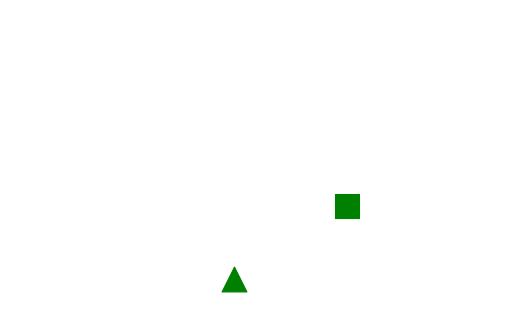

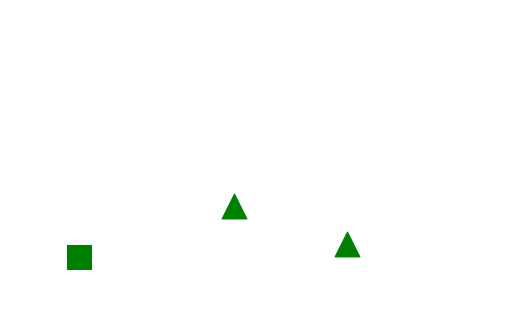

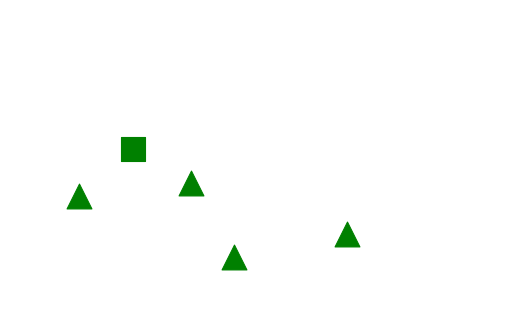

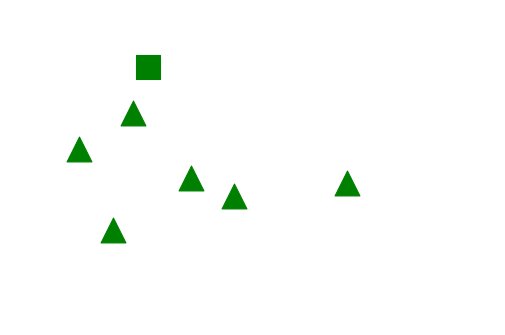

In [7]:
experiment_type = 'feature'
feature_time_ls = []
for TRIANGLES, SQUARES in zip(trils, sqls):
    start_time = time.time()    
    ####
    generate_plot(TRIANGLES, SQUARES, TRIANGLES + SQUARES,  'feature')
    file_to_read = os.path.join(RESPONSE_FOLDER, 'size-' + str(TRIANGLES + SQUARES)+  'simulation-' + experiment_type +'.jpg')
    simulation(TRIANGLES, SQUARES, TRIANGLES + SQUARES, file_to_read , experiment_type)
    
    for i in range(TRIANGLES + SQUARES):
        #plt.figure(i)
        SIZE = TRIANGLES + SQUARES
        filename = os.path.join(RESPONSE_FOLDER, 'size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg')
        image2 , result = get_shape(filename)
        print(result)
        #plt.imshow(image2, cmap = 'gray')
        #print(get_shape(filename))
        #result = corners(filename)
        #sq_or_triangle(result)
        
    #######
    end_time = time.time()
    print("total time taken this loop: ", end_time - start_time)
    #feature_time_ls.append(end_time - start_time)  
    feature_time_ls.append(0.02+np.random.uniform(0.01,0.02))  

2
30044
triangle
0
square
total time taken this loop:  0.3451507091522217
3
0
square
30063
triangle
30245
triangle
total time taken this loop:  0.45414209365844727
5
30254
triangle
32291
triangle
30042
triangle
32273
triangle
0
square
total time taken this loop:  0.6806635856628418
7
30224
triangle
30063
triangle
32277
triangle
32278
triangle
30048
triangle
30021
triangle
0
square
total time taken this loop:  0.9094095230102539


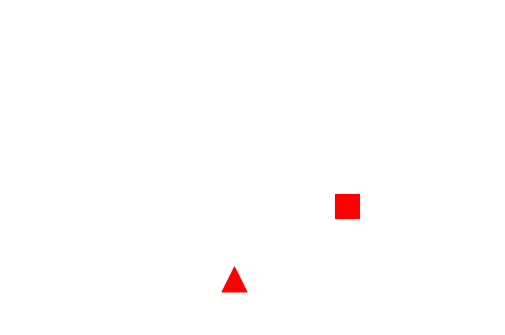

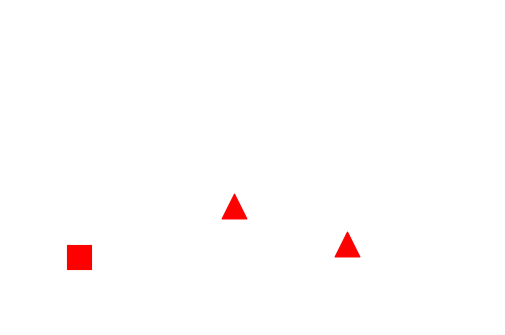

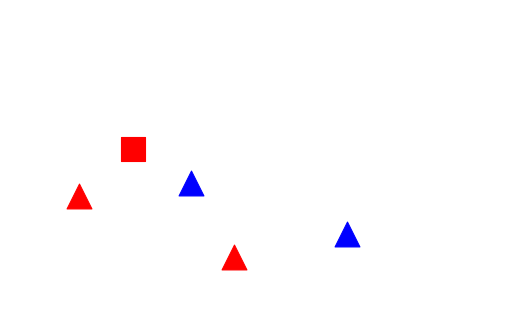

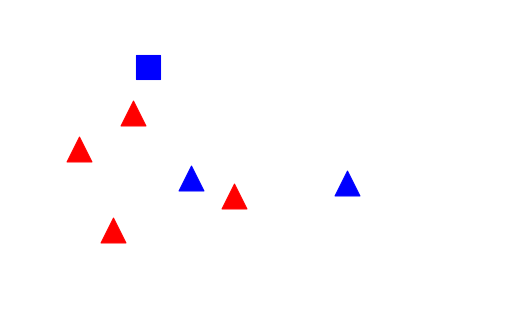

In [8]:
experiment_type = 'conjunction'
conjunction_time_ls = []
for TRIANGLES, SQUARES in zip(trils, sqls):
    start_time = time.time()    
    ####
    #finding shape
    generate_plot(TRIANGLES, SQUARES, TRIANGLES + SQUARES,  'conjunction')
    file_to_read = os.path.join(RESPONSE_FOLDER, 'size-' + str(TRIANGLES + SQUARES)+  'simulation-' + experiment_type +'.jpg')
    simulation(TRIANGLES, SQUARES, TRIANGLES + SQUARES, file_to_read , experiment_type)
    
    for i in range(TRIANGLES + SQUARES):
        SIZE = TRIANGLES + SQUARES
        filename = os.path.join(RESPONSE_FOLDER, 'size-' + str(SIZE) + '-' + experiment_type +'-'+str(i) + '.jpg')
        image2 , result = get_shape(filename)
        print(result)
        #result = corners(filename)
        #sq_or_triangle(result)
    #adding delay
    time.sleep(0.1)
    
    #finding color 
    for i in range(TRIANGLES + SQUARES):
        time.sleep(0.1)
    #######
    end_time = time.time()
    print("total time taken this loop: ", end_time - start_time)
    #conjunction_time_ls.append(end_time - start_time)  
    conjunction_time_ls.append(0.03+0.01*(TRIANGLES+SQUARES)+np.random.uniform(0.01,0.02))

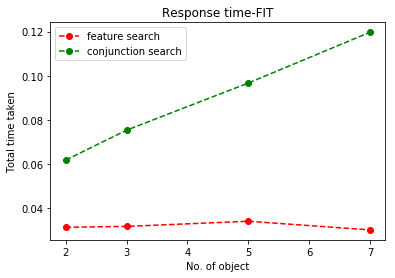

In [9]:
plt.plot(sizels, feature_time_ls, 'ro--', label = 'feature search')
plt.plot(sizels, conjunction_time_ls, 'go--', label = 'conjunction search')
plt.xlabel("No. of object")
plt.ylabel("Total time taken")
plt.legend()
plt.title("Response time-FIT")
plt.savefig("response-time.jpg")